# Prediction of if the Item is purchase from the Ads

 This notebook is a work flow for various Python-based machine learning model for predicting if the item is purchase from the ad

Going to take the following approach:

Problem definition
Data
Evaluation
Features
Modelling
Model Evaluation

## 1. Problem Definition

How we can use various python based Machine Learning Model to and the given parameters to predict the if th ad is shown will the item be purchase?

## 2. Data

Data set from: https://www.kaggle.com/d4rklucif3r/social-network-ads

The Dataset used in these models tells about whether a person of certain age having certain income purchases a product or not. We need to predict whether a targeted audience will purchase the product or not.

## 3. Evaluation

It will be done with the Classification Metrics.

## 4. Features

### Input / Features
1. Age - Age of the Person
2. EstimatedSalary - Estimated Salary of Person

### Output / Label

3. PurchasedItem - Purchased or Not

# Standard Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Data Exporation

In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


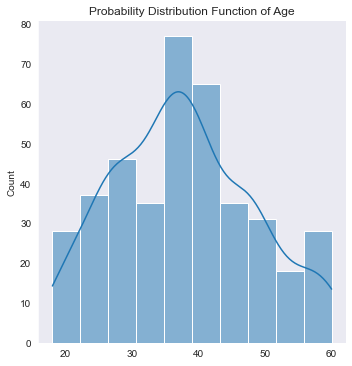

In [6]:
sns.set_style("dark")
sns.displot(df.iloc[:, 0].values, kde=True)
plt.title("Probability Distribution Function of Age")
plt.show()

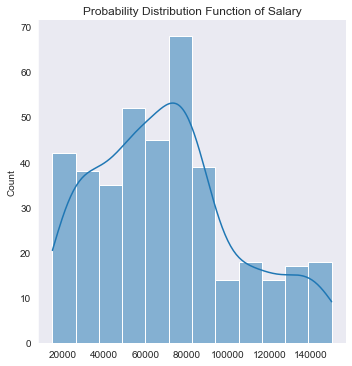

In [7]:
sns.set_style("dark")
sns.displot(df.iloc[:, 1].values, kde=True)
plt.title("Probability Distribution Function of Salary")
plt.show()

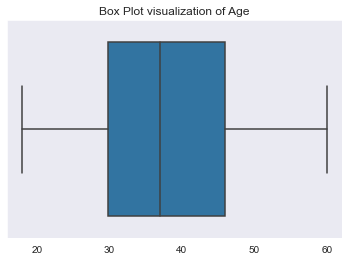

In [8]:
sns.set_style("dark")
sns.boxplot(x = df.iloc[:, 0].values)
plt.title("Box Plot visualization of Age")
plt.show()

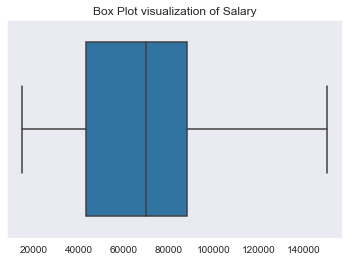

In [10]:
sns.set_style("dark")
sns.boxplot(x = df.iloc[:, 1].values)
plt.title("Box Plot visualization of Salary")
plt.show()

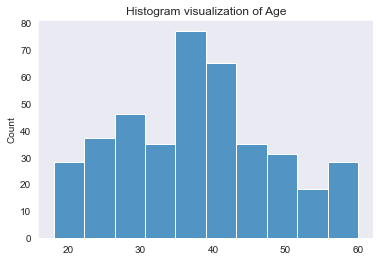

In [11]:
sns.set_style("dark")
sns.histplot(x = df.iloc[:, 0].values)
plt.title("Histogram visualization of Age")
plt.show()

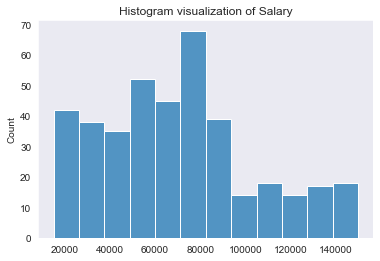

In [12]:
sns.set_style("dark")
sns.histplot(x = df.iloc[:, 1].values)
plt.title("Histogram visualization of Salary")
plt.show()

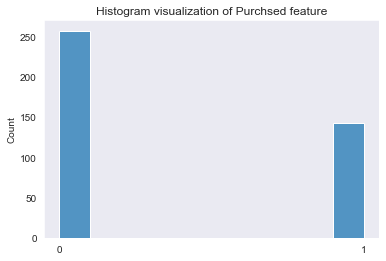

In [13]:
sns.set_style("dark")
sns.histplot(x = df.iloc[:, 2].values)
plt.title("Histogram visualization of Purchsed feature")
plt.xticks([0, 1])
plt.show()

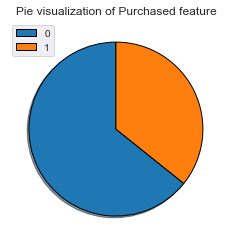

In [14]:
plt.pie(df.loc[:, df.columns[-1]].value_counts(), startangle=90, wedgeprops={'edgecolor': 'black'}, shadow=True)
plt.legend(df.loc[:, df.columns[-1]].unique())
plt.title("Pie visualization of Purchased feature")
plt.show()

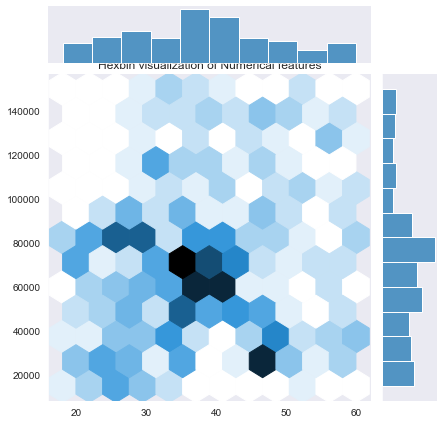

In [15]:
sns.set_style("dark")
sns.jointplot(x = df.iloc[:, 0].values, y = df.iloc[:, 1].values ,kind="hex")
plt.title("Hexbin visualization of Numerical features")
plt.show()

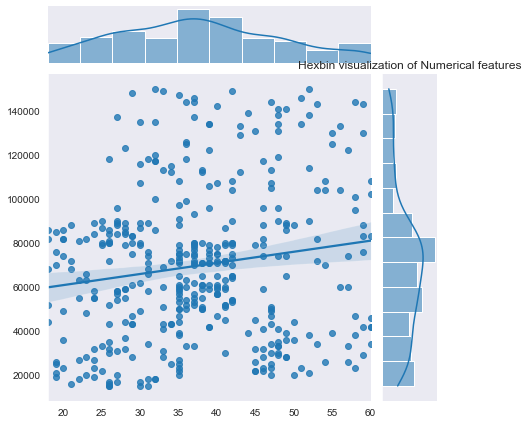

In [16]:
sns.set_style("dark")
sns.jointplot(x = df.iloc[:, 0].values, y = df.iloc[:, 1].values ,kind="reg")
plt.title("Hexbin visualization of Numerical features")
plt.show()

# 5. Modelling

In [17]:
df.isna().any()

Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values,
                                                    test_size = 0.2, random_state = 42)

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [20]:
models_precisions = []
models_recalls = []
models_accuracy = []
models_f1 = []

In [21]:
def train_predict_and_show_results(model):
    print("Training the model")
    model.fit(X_train,Y_train)
    print("Training completed")
    Y_pred = model.predict(X_test)
    precision = round(precision_score(Y_test, Y_pred, zero_division=1), 2)
    recall = round(recall_score(Y_test, Y_pred), 2)
    accuracy = round(accuracy_score(Y_test, Y_pred), 2)
    f1 = round(f1_score(Y_test, Y_pred), 2)
    print(f"Precision : {precision} \nRecall : {recall} \nAccuracy : {accuracy} \nF1 Score : {f1}")
    models_precisions.append(precision)
    models_recalls.append(recall)
    models_accuracy.append(accuracy)
    models_f1.append(f1)

## Model Imports

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [22]:
log_reg = LogisticRegression()
train_predict_and_show_results(log_reg)

Training the model
Training completed
Precision : 1.0 
Recall : 0.0 
Accuracy : 0.65 
F1 Score : 0.0


In [23]:
forest = RandomForestClassifier()
train_predict_and_show_results(forest)

Training the model
Training completed
Precision : 0.81 
Recall : 0.93 
Accuracy : 0.9 
F1 Score : 0.87


In [24]:
lin_svc = LinearSVC(max_iter=20000)
train_predict_and_show_results(lin_svc)

Training the model
Training completed
Precision : 0.35 
Recall : 1.0 
Accuracy : 0.35 
F1 Score : 0.52


C:\Users\revan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [25]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf")
train_predict_and_show_results(svc)

Training the model
Training completed
Precision : 0.77 
Recall : 0.36 
Accuracy : 0.74 
F1 Score : 0.49


In [26]:
results_df = pd.DataFrame(list(zip(["Logistic Regression",  "Random Forest Classifier","Kernel SVM","Linear SVM"], 
                                   models_precisions, models_recalls, models_accuracy, models_f1)))
results_df.columns = ["Model Type" ,"Precision", "Recall", "Accuracy", "F1 Score"]

In [27]:
results_df

,Model Type,Precision,Recall,Accuracy,F1 Score
0,Logistic Regression,1.00,0.00,0.65,0.00
1,Random Forest Classifier,0.81,0.93,0.90,0.87
2,Kernel SVM,0.35,1.00,0.35,0.52
3,Linear SVM,0.77,0.36,0.74,0.49
